# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D ,BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


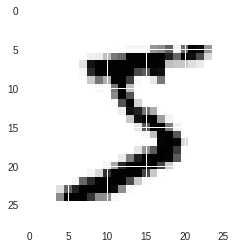

In [18]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [23]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(name='norm_1'))
model.add(Convolution2D(10, (1,1), activation='relu',))

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(name='norm_2'))
model.add(Convolution2D(10, (1,1), activation='relu',))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(name='norm_3'))
model.add(Convolution2D(10, (1,1), activation='relu',))

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(name='norm_4'))
model.add(Convolution2D(10, (1,1), activation='relu',))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(name='norm_5'))
model.add(Convolution2D(10, (1,1), activation='relu',))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        2912      
_________________________________________________________________
norm_2 (BatchNormalization)  (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 10)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 50s 835us/step - loss: 0.2826 - acc: 0.9115 - val_loss: 0.0780 - val_acc: 0.9742
Epoch 2/25
60000/60000 [==============================] - 48s 808us/step - loss: 0.0767 - acc: 0.9760 - val_loss: 0.0600 - val_acc: 0.9808
Epoch 3/25
60000/60000 [==============================] - 48s 808us/step - loss: 0.0586 - acc: 0.9818 - val_loss: 0.0481 - val_acc: 0.9856
Epoch 4/25
60000/60000 [==============================] - 48s 808us/step - loss: 0.0502 - acc: 0.9843 - val_loss: 0.0525 - val_acc: 0.9835
Epoch 5/25
60000/60000 [==============================] - 48s 807us/step - loss: 0.0441 - acc: 0.9862 - val_loss: 0.0515 - val_acc: 0.9838
Epoch 6/25
60000/60000 [==============================] - 48s 807us/step - loss: 0.0384 - acc: 0.9873 - val_loss: 0.0476 - val_acc: 0.9853
Epoch 7/25
60000/60000 [==============================] - 49s 816us/step - loss: 0.0336 - acc: 0.9889 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [29]:
print(score)

[0.02976246628436347, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [31]:
print(y_pred[:9])
print(y_test[:9])

[[2.4377326e-13 4.4750395e-09 4.6362900e-11 8.9053120e-10 3.5669531e-10
  2.4214270e-08 3.1189212e-19 9.9999988e-01 2.7192504e-12 1.0291943e-07]
 [5.5721966e-07 6.7803842e-07 9.9999762e-01 2.6737031e-12 3.9384482e-10
  1.9456113e-08 7.0278475e-07 5.0145206e-07 1.7121982e-08 1.2869716e-08]
 [2.8546691e-14 9.9999952e-01 8.4881179e-08 1.2448692e-10 1.2833512e-08
  1.6261099e-07 1.5773735e-10 5.8015663e-09 4.4860917e-11 7.8232013e-08]
 [9.9999845e-01 2.4027986e-09 2.4083116e-07 8.3526480e-10 1.8386388e-09
  1.0719496e-08 8.9188433e-07 2.4187794e-11 2.3545252e-07 1.2116936e-07]
 [3.4001389e-11 5.6930483e-09 1.1137919e-09 4.7844673e-15 9.9997926e-01
  5.4205662e-09 6.0612463e-13 3.9263531e-10 1.1303918e-08 2.0770469e-05]
 [1.3045803e-12 9.9999917e-01 3.2621895e-08 2.5680036e-13 6.0421058e-08
  3.0355203e-08 6.7648269e-11 5.0089886e-07 1.9485276e-10 1.9909186e-07]
 [3.8711459e-14 3.1770372e-07 4.9070241e-08 2.2962407e-13 9.9245089e-01
  1.3814043e-05 7.4202667e-12 5.2380710e-06 8.5510510e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()